# Gradient Descent

#### KR: "The most important algorithm in Machine Learning!"

In e.g. linear regression, we want to find the parameters that provide the best fit to our data. To do that we need:

1. A measure of how well our model is performing. In machine learning that's normally known as a **loss function**. If our model is performing well, we want the loss function to be small in value. If the model isn't performing well, we want the loss function to reflect that and be large. Did you see a loss function yesterday that satisfies this?

$$ MSE = \frac{1}{n} \sum(y_{pred}-y_{true})^2 $$

2. A way to change our model parameters in a way that gets us from a model that isn't performing well, to a model that performs well -- a model which minimizes the loss function. In the general case this is called an **optimization algorithm**; today we'll look at a particular type of optimization algorithm called gradient descent.

$$ w_{new} = w_{old} + \Delta w $$

$$ \Delta w = -\alpha \; \nabla L(w) $$

Here:

$\alpha$ is the learning rate

$\nabla L(w) $ is the gradient (first derivative) of the loss function with respect to parameter $w$

For *linear regression*, your loss function will look something like this. Let's see on this simple example how and why the weights update formula makes sense.

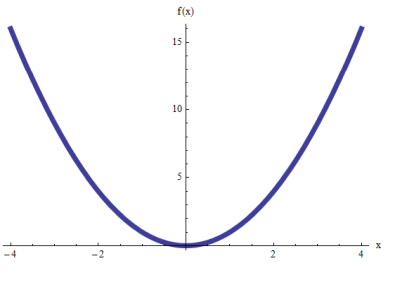

Let's now try to implement gradient descent ourselves.

## Gradient Descent from Scratch

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['font.size'] = 14

### Step 0: _create data_

Let's first create some data points following roughly the line:

$$ y = -1.5 + 2.0x $$

In [28]:
slope = 2.0
intercept = -1.5

In [29]:
x = np.random.normal(0, 1, 500)

In [30]:
ytrue = slope*x + intercept + np.random.normal(0, 1, len(x))

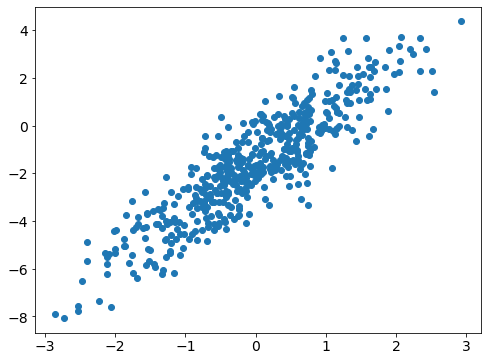

In [31]:
plt.scatter(x, ytrue)

### Step 1: _make line_

We'd now like to create a function that for a list of values (`x`) returns the predicted value of y (`ypred`) given a slope (`w1`) and an intercept (`w0`).

In [32]:
def make_line(x, w0, w1):  
    ypred = w0 + w1*x
    return ypred

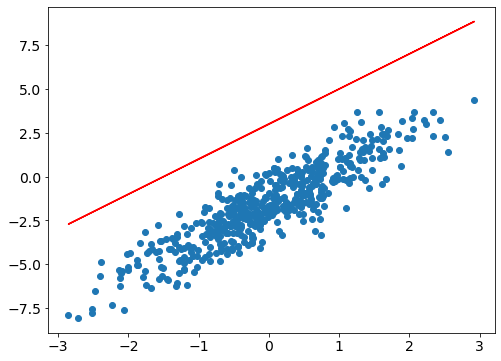

In [33]:
plt.scatter(x, ytrue)
plt.plot(x, make_line(x, 3, 2), color='r')

### Step 2: _calculate loss function_

We already defined our loss function above. Let's now code it.

$$ MSE = \frac{1}{n} \sum (y_{true}-y_{pred})^2 $$

In [34]:
def mse(ytrue, ypred):
    error = np.mean((ytrue-ypred)**2)
    return error

In [35]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

### Step 3: _calculate gradient_

To calculate the first derivative, use the definition of the derivative:

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} $$

Things to keep in mind:
* Make sure you use all functions you defined above
* We are calculating partial derivatives of the loss function with respect to the parameters, so when tweaking w0 we're keeping w1, and vice versa.

In [36]:
def calc_gradient(x, ytrue, w0, w1):

    dw = 0.0001
    ypred = make_line(x, w0, w1)

    '''tweak first parameter'''
    w1_change = w1 + dw
    # calculate predictions using w0 and w1_change
    ypred_w1 = make_line(x, w0, w1_change)
    deriv_w1 = (mse(ytrue, ypred_w1) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    w0_change = w0 + dw
    # calculate predictions using w0_change and w1
    ypred_w0 = make_line(x, w0_change, w1)
    deriv_w0 = (mse(ytrue, ypred_w0) - mse(ytrue, ypred)) / dw

    return [deriv_w0, deriv_w1] # return both derivations as a list    

### Step 4: _implement gradient descent_

Repeat the following steps `MAX_ITER`times.
In each iteration of the loop:

      1. Calculate the gradient of the loss function
         with respect to each model parameter.
      2. If the gradient becomes really close to zero,
         break out of the loop.
      3. For each model parameter,
         - calculate the updated parameter value using the formula from above.
         - overwrite the value with its updated value.
      4. Print all variables to check if they
         are converging to their expected values.


ITERATION: 0
SLOPE: 4.399505935432586, derivative: 6.004940645674139
INTERCEPT: -1.0904365686480446, derivative: 0.9043656864804461


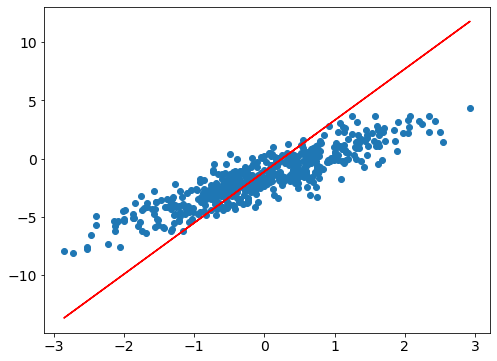

ITERATION: 10
SLOPE: 2.258936133613716, derivative: 0.642711347142999
INTERCEPT: -1.4698311862012527, derivative: 0.1418091049365522


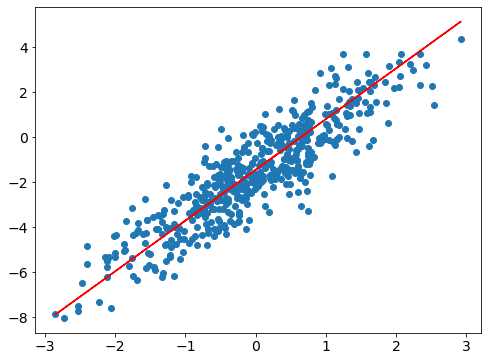

ITERATION: 20
SLOPE: 2.0294075707453185, derivative: 0.0691232029415012
INTERCEPT: -1.5265170118056162, derivative: 0.02002173163262455


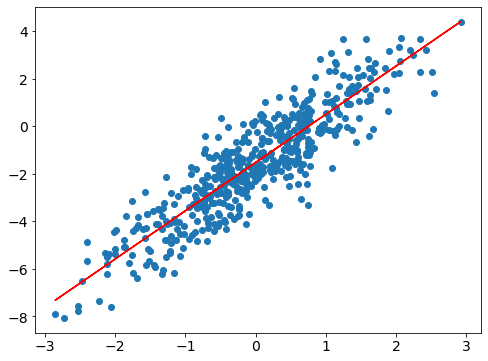

CONVERGED, ITERATION 29
SLOPE: 2.006356995269183, INTERCEPT: -1.533723946458009
Derivatives & threshold: 0.0032684936490667837, 0.009328970860256192, 0.01


In [37]:
w0 = -1.0 # arbitrary starting value
w1 = 5.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500
THRESHOLD = 0.01

for i in range(MAX_ITER):
    
    # 1. Calculate the gradient of the loss function with respect to each model parameter.
    deriv_w0, deriv_w1 = calc_gradient(x, ytrue, w0, w1)
    
    # 2. If the gradient becomes really close to zero, break out of the loop.
    if ((abs(deriv_w0) <= THRESHOLD) and (abs(deriv_w1) <= THRESHOLD)):
        print(f"CONVERGED, ITERATION {i}")
        print(f"SLOPE: {w1}, INTERCEPT: {w0}")
        print(f"Derivatives & threshold: {deriv_w0}, {deriv_w1}, {THRESHOLD}")
        break
        
    # 3. For each model parameter,
    else:
    # - calculate the updated parameter value using the formula from above.
        w0_new = w0 - LR*deriv_w0
        w1_new = w1 - LR*deriv_w1
    # - overwrite the value with its updated value.
        w0 = w0_new
        w1 = w1_new
        
    # 4. Print all variables to check if they are converging to their expected values.
    if i % 10 == 0:
        print(f"ITERATION: {i}")
        print(f"SLOPE: {w1}, derivative: {deriv_w1}")
        print(f"INTERCEPT: {w0}, derivative: {deriv_w0}")
        
        plt.scatter(x, ytrue)
        plt.plot(x, make_line(x, w0, w1), color='r')
        plt.show()

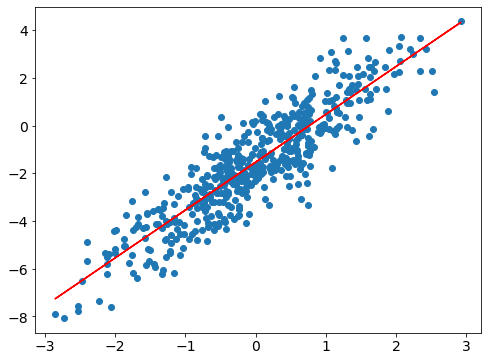

In [38]:
plt.scatter(x, ytrue)
plt.plot(x, make_line(x, w0, w1), color='r')